<a href="https://colab.research.google.com/github/Saddam705/mobile-price-range-prediction/blob/main/mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#mobile price range prediction

##Introduction
Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

A mobile phone, cell phone, cellphone, or hand phone, sometimes shortened to simply mobile, cell or just phone, is a portable telephone that can make and receive calls over a radio frequency link while the user is moving within a telephone service area.

The first handheld mobile phone was demonstrated by John F. Mitchell and Martin Cooper of Motorola in 1973, using a handset weighing c. 2 kilograms (4.4 lbs).

In 1979, Nippon Telegraph and Telephone (NTT) launched the world's first cellular network in Japan. In 1983, the DynaTAC 8000x was the first commercially available handheld mobile phone. From 1983 to 2014, worldwide mobile phone subscriptions grew to over seven billion—enough to provide one for every person on Earth.

In first quarter of 2016, the top smartphone developers worldwide were Samsung, Apple, and Huawei, and smartphone sales represented 78 percent of total mobile phone sales. For feature phones (or "dumbphones") as of 2016, the largest were Samsung, Nokia, and Alcatel.

##The Problem
The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.

##Dataset as 21 features and 2000 entries. The meanings of the features are given below.

*  battery_power: Total energy a battery can store in one time measured in mAh
*  blue: Has bluetooth or not
*  clock_speed: speed at which microprocessor executes instructions
*  dual_sim: Has dual sim support or not
*  fc: Front Camera mega pixels
*  four_g: Has 4G or not
*  int_memory: Internal Memory in Gigabytes
*  m_dep: Mobile Depth in cm
*  mobile_wt: Weight of mobile phone
*  n_cores: Number of cores of processor
*  pc: Primary Camera mega pixels
*  px_height: Pixel Resolution Height
*  px_width: Pixel Resolution Width
*  ram: Random Access Memory in Mega Byte
*  sc_h: Screen Height of mobile in cm
*  sc_w: Screen Width of mobile in cm
*  talk_time: longest time that a single battery charge will last when you are
three_g: Has 3G or not
*  touch_screen: Has touch screen or not
*  wifi: Has wifi or not
*  price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

##Methodology
We will proceed with reading the data, and then perform data analysis. The practice of examining data using analytical or statistical methods in order to identify meaningful information is known as data analysis. After data analysis, we will find out the data distribution and data types. We will train 4 classification algorithms to predict the output. We will also compare the outputs. Let us get started with the project implementation.

In [3]:
#First, we import the libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Almabetter course/capston project/ml 2 mobile range prediction/data_mobile_price_range.csv')

we renamed our dataset name as data. further analysis we will be do as the name of DATA.

In [8]:
#lets check the sample of the data set
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

according to given information we can see their is 21 features in the dataset.
all the 19 features are training data and 20th feature is the target variable.

In [10]:
# lets check few laast row of our data.
data.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

In [9]:
#Now, we will use the info function to see the type of data in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

yes . luckily we have notnull dataset .their is no column with null values so we can start further analysis withount carring of null values.
according to our data set only two columns have string feature and other all columns have integer values.

In [17]:
#lets check the baxic information about the data
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h    sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.0   
mean    645.108000  1251.515500  2124.213000    12.306500     0.0   
std     443.780811   432.199447  1084.732044     4.213245     0.0   
min       0.000000   500.000000   256.000000     5.000000     0.0   
25%     282.750000   874.750000  1207.500000     9.000000     0.0   
50%     564.000000  1247.000000  2146.500000    12.000000     0.0   
75%     947.250000  1633.000000  3064.500000    16.000000     0.0   
max    1960.000000  1998.000000  3998.000000    19.000000     0.0   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [19]:
#lets check besic analysis including categorical columns.
data.describe(include="all")

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h    sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.0   
mean    645.108000  1251.515500  2124.213000    12.306500     0.0   
std     443.780811   432.199447  1084.732044     4.213245     0.0   
min       0.000000   500.000000   256.000000     5.000000     0.0   
25%     282.750000   874.750000  1207.500000     9.000000     0.0   
50%     564.000000  1247.000000  2146.500000    12.000000     0.0   
75%     947.250000  1633.000000  3064.500000    16.000000     0.0   
max    1960.000000  1998.000000  3998.000000    19.000000     0.0   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

as the output showing data set of 75% and max don't have huge difference so we can say there is no outlier as well. but for the confirmation we will check throgh boxplot in further analysis.

#exploratry data analysis

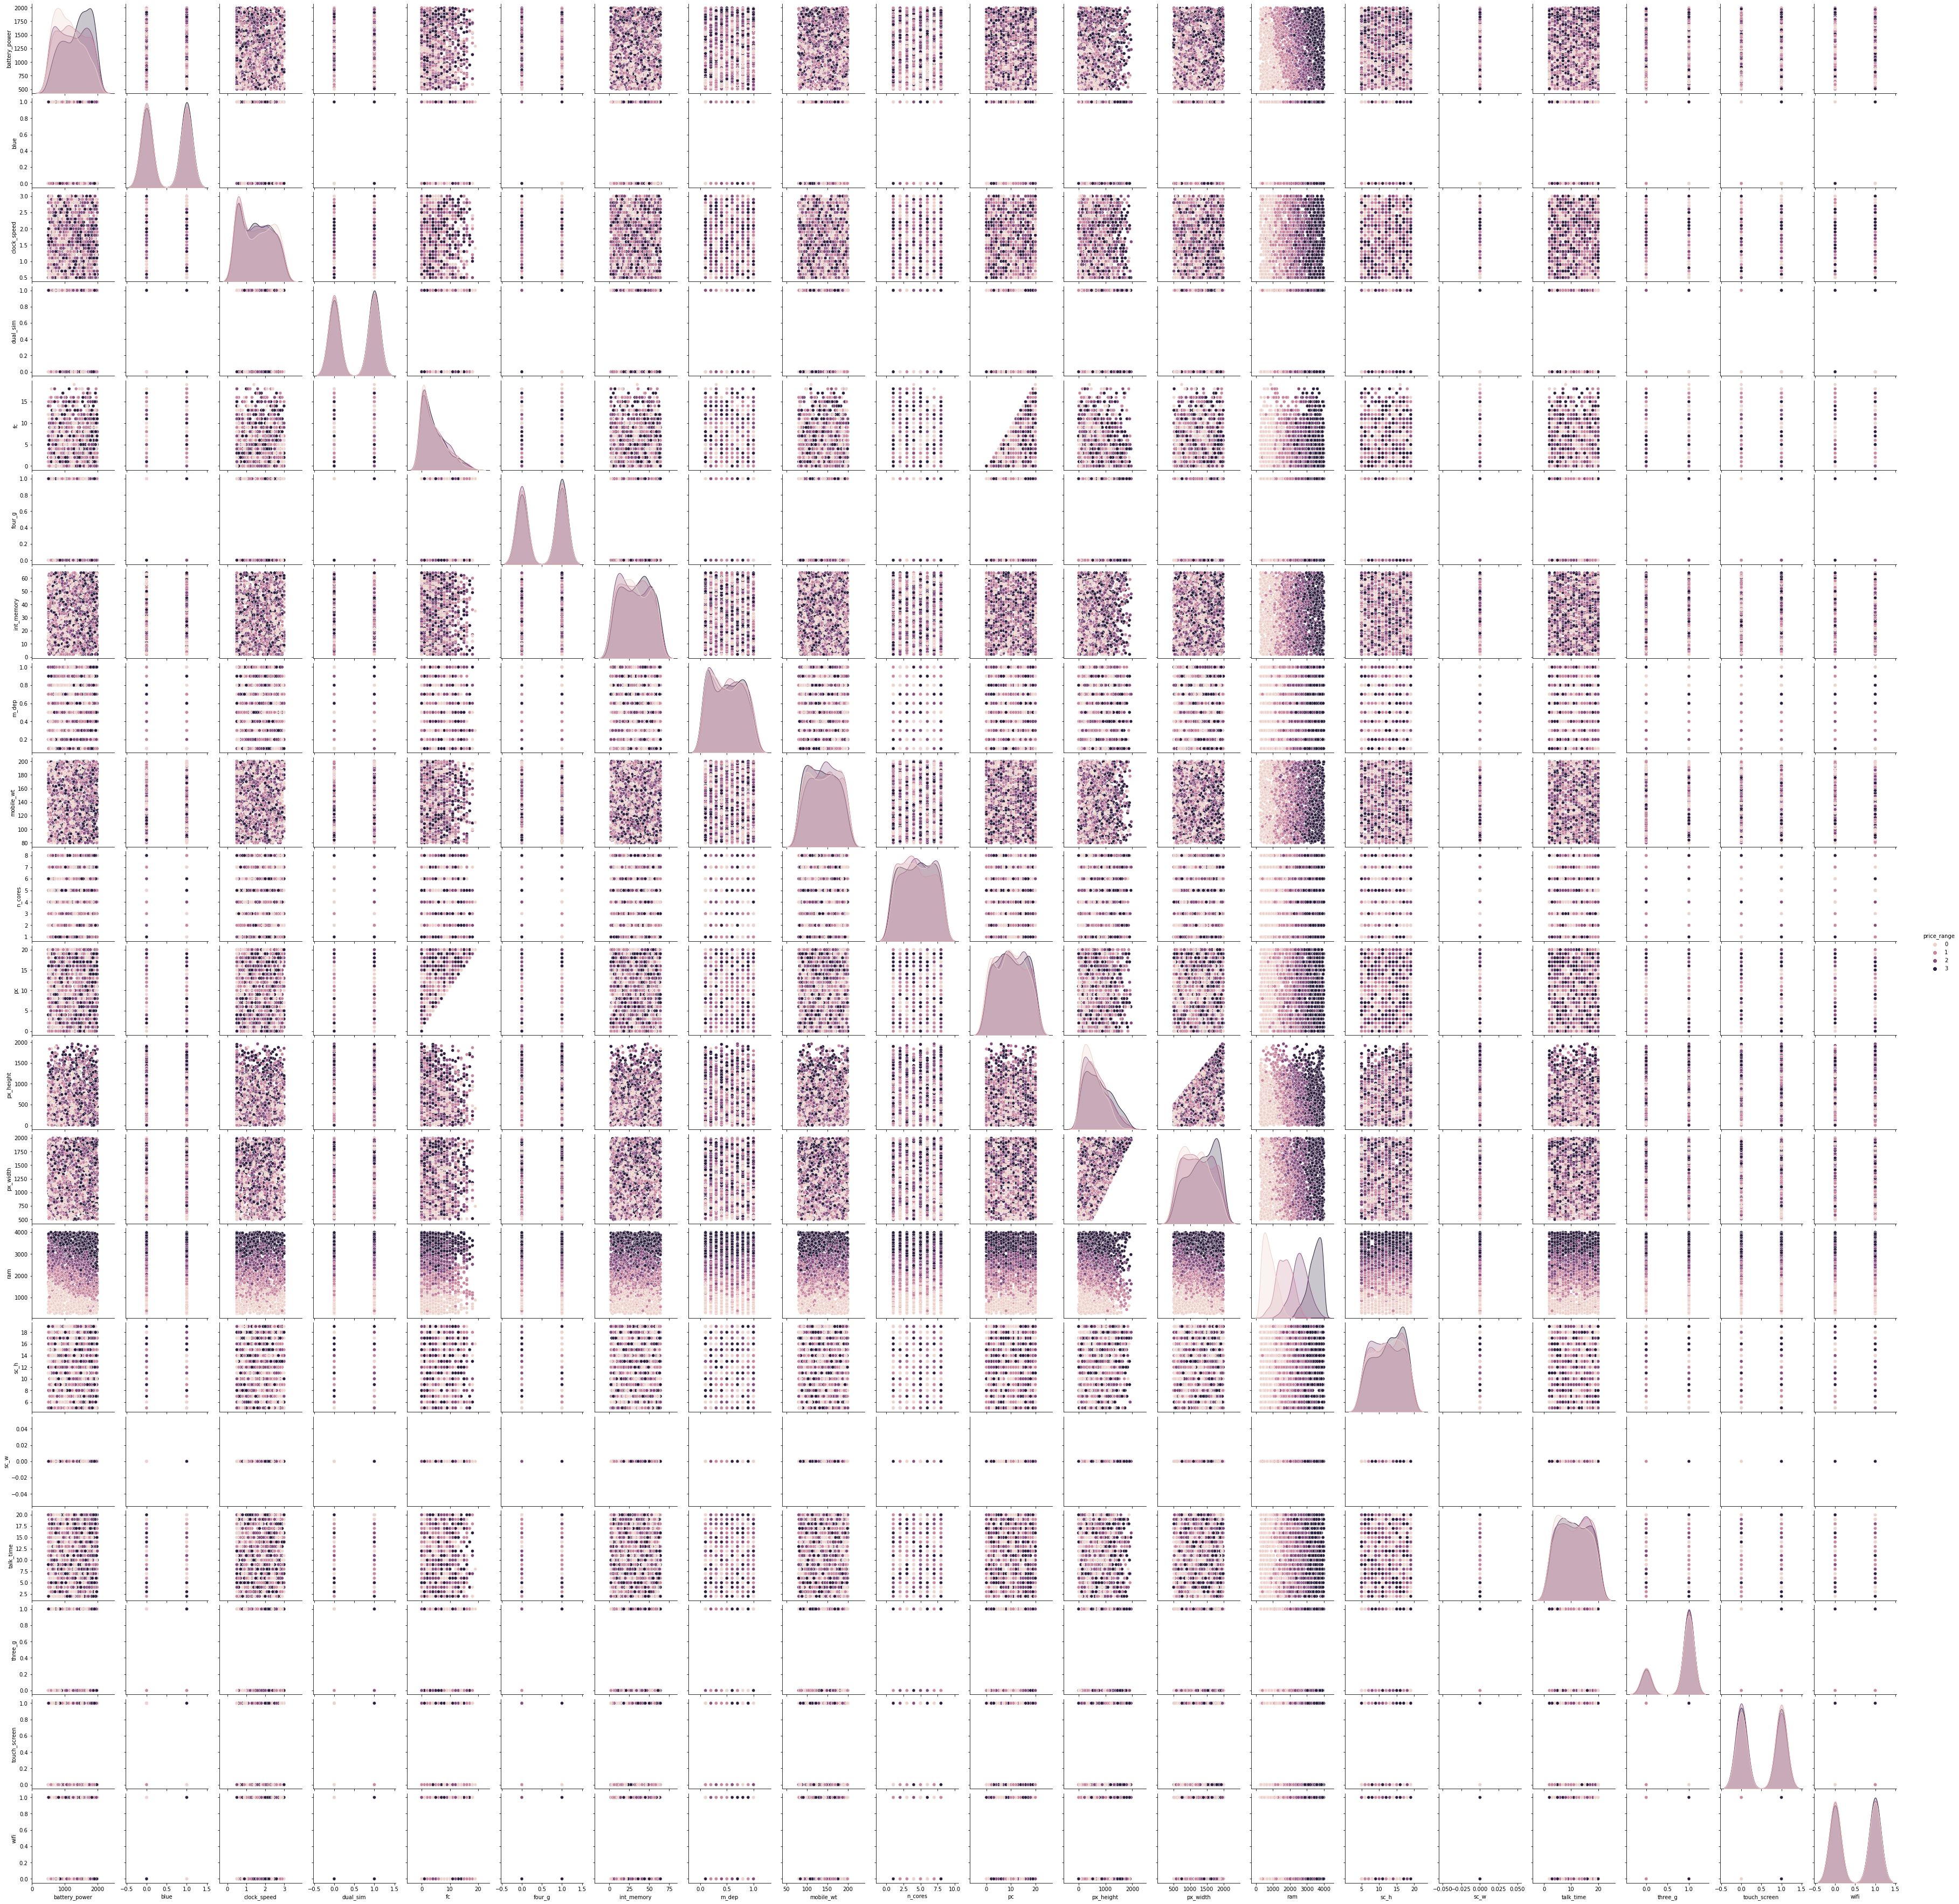

In [22]:
sns.pairplot(data, hue='price_range')